In [ ]:
import os, argparse
import torch
import torchvision

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%run '/content/drive/MyDrive/Colab Notebooks/CPSC 490/model/classification_model.ipynb'
%run '/content/drive/MyDrive/Colab Notebooks/CPSC 490/model/read_images_labels.ipynb'
%run '/content/drive/MyDrive/Colab Notebooks/CPSC 490/model/classification_cnn.ipynb'

Mounted at /content/drive


In [ ]:
# initializing folder paths
checkpoint_folder = '/content/drive/MyDrive/Colab Notebooks/CPSC 490/checkpoints/'
output_folder = '/content/drive/MyDrive/Colab Notebooks/CPSC 490/output/'

# initializing hyper parameters and dataset
n_batch = 20
n_epoch = 15
dataset = "completion"
learning_rate = 0.015
learning_rate_decay = 0.01
learning_rate_period = 5

# initializing folder to keep track of models of one training run
model_run_folder = f"{dataset}_batch{n_batch}_lr{learning_rate}_epoch{n_epoch}"

# argument dictionary
args = {
    'n_batch': n_batch,
    'n_epoch': n_epoch,
    'dataset': dataset,
    'encoder_type': 'resnet18',
    'learning_rate': learning_rate,
    'learning_rate_decay': learning_rate_decay,
    'learning_rate_period': learning_rate_period,
    'checkpoint_path': checkpoint_folder + model_run_folder,
    "output_path": output_folder + model_run_folder + ".png",
    'device': 'gpu'
}

/content/drive/MyDrive/Colab Notebooks/CPSC 490/checkpoints/completion_batch20_lr0.015_epoch15


In [ ]:
# Define dataloader and number of classes depending on dataset
if args['dataset'] == 'stroke':
  dataloader_train = training_stroke_dataloader
  n_class = 4
else:
  dataloader_train = training_completion_dataloader
  n_class = 2

# TODO: Define the possible classes in depending on args.dataset variable

# TODO: Get number of classes in dataset
'''
Set up model and optimizer
'''

model = ClassificationModel(encoder_type=args['encoder_type'], device=args['device'])

# TODO: Setup learning rate SGD optimizer and step function scheduler
# https://pytorch.org/docs/stable/optim.html?#torch.optim.SGD
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=args['learning_rate'],
    weight_decay=args['learning_rate_decay']
)

'''
Train network and store weights
'''
# TODO: Set network to training mode
model.train()

# TODO: Train network
train(model=model,
      dataloader=dataloader_train,
      n_epoch=args['n_epoch'],
      optimizer=optimizer,
      learning_rate_decay=args['learning_rate_decay'],
      learning_rate_decay_period=args['learning_rate_period'],
      checkpoint_path=args['checkpoint_path'],
      device=args['device'])

epoch: 0  batch: 299it [30:43,  6.16s/it]


Epoch=1/15  Loss: 0.200


epoch: 1  batch: 299it [02:14,  2.22it/s]


Epoch=2/15  Loss: 0.169


epoch: 2  batch: 299it [02:16,  2.19it/s]


Epoch=3/15  Loss: 0.156


epoch: 3  batch: 299it [02:13,  2.24it/s]


Epoch=4/15  Loss: 0.140


epoch: 4  batch: 299it [02:14,  2.22it/s]


Epoch=5/15  Loss: 0.123


epoch: 5  batch: 299it [02:14,  2.22it/s]


Epoch=6/15  Loss: 0.103


epoch: 6  batch: 299it [02:13,  2.23it/s]


Epoch=7/15  Loss: 0.082


epoch: 7  batch: 299it [02:15,  2.21it/s]


Epoch=8/15  Loss: 0.070


epoch: 8  batch: 299it [02:15,  2.21it/s]


Epoch=9/15  Loss: 0.056


epoch: 9  batch: 299it [02:11,  2.28it/s]


Epoch=10/15  Loss: 0.046


epoch: 10  batch: 299it [02:09,  2.31it/s]


Epoch=11/15  Loss: 0.039


epoch: 11  batch: 299it [02:12,  2.25it/s]


Epoch=12/15  Loss: 0.037


epoch: 12  batch: 299it [02:13,  2.24it/s]


Epoch=13/15  Loss: 0.032


epoch: 13  batch: 299it [02:09,  2.31it/s]


Epoch=14/15  Loss: 0.025


epoch: 14  batch: 299it [02:15,  2.21it/s]


Epoch=15/15  Loss: 0.025


checkpoint: 100.0
checkpoint: 100.0
checkpoint: 100.0
checkpoint: 100.0
checkpoint: 100.0
checkpoint: 99.33333333333333
checkpoint: 97.14285714285714
checkpoint: 94.5
checkpoint: 92.0
checkpoint: 89.2
checkpoint: 89.45454545454545
checkpoint: 89.0
checkpoint: 88.0
checkpoint: 88.0
checkpoint: 85.86666666666667
checkpoint: 85.25
checkpoint: 85.88235294117646
checkpoint: 86.0
checkpoint: 85.89473684210527
checkpoint: 86.6
checkpoint: 87.23809523809524
checkpoint: 87.45454545454545
checkpoint: 88.0
checkpoint: 87.83333333333333
checkpoint: 87.68
checkpoint: 87.84615384615385
checkpoint: 87.85185185185185
checkpoint: 87.42857142857143
checkpoint: 87.17241379310346
checkpoint: 87.46666666666667
checkpoint: 87.22580645161291
checkpoint: 87.0
checkpoint: 86.9090909090909
checkpoint: 86.11764705882354
checkpoint: 85.37142857142858
checkpoint: 85.33333333333334
checkpoint: 85.72972972972973
checkpoint: 86.10526315789474
checkpoint: 86.46153846153845
checkpoint: 86.8
checkpoint: 87.1219512195122

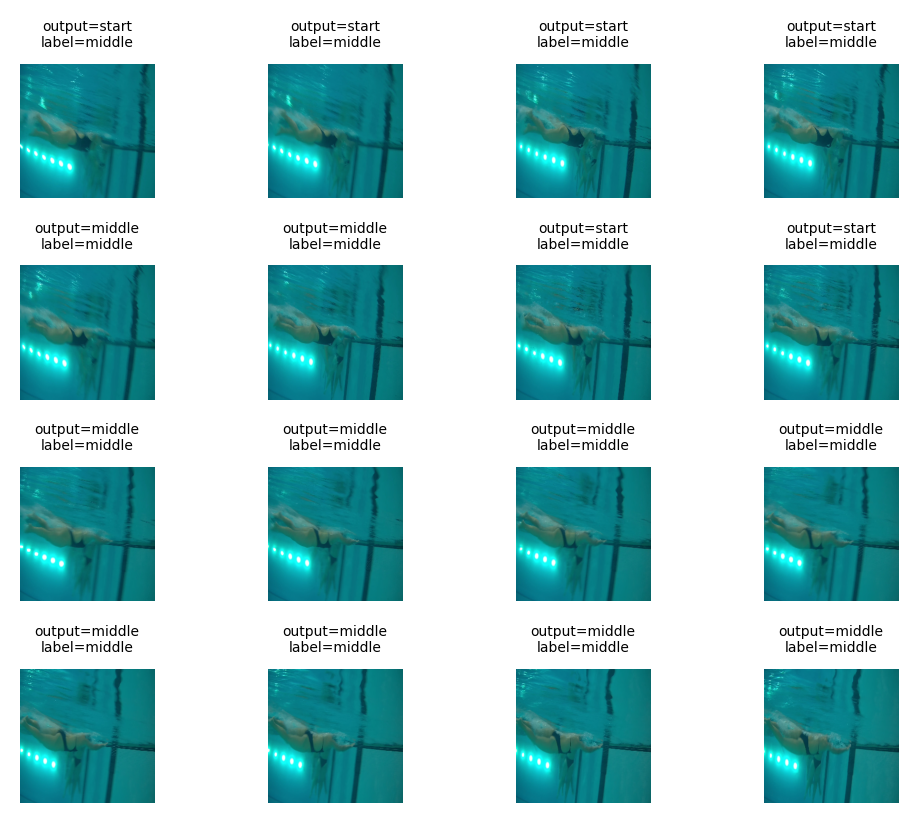

In [ ]:
'''
Set up model to run
'''

# Define dataloader and class names depending on dataset
if args['dataset'] == 'stroke':
  dataloader_test = testing_stroke_dataloader
  class_names = ['fly', 'back', 'breast', 'free']
else:
  dataloader_test = testing_completion_dataloader
  class_names = ['middle', 'start']

# TODO: Instantiate network
model = ClassificationModel(encoder_type=args['encoder_type'],
                            device='cuda')

'''
Restore weights and evaluate network
'''
# TODO: Load network from checkpoint
model_number = 14
model_path = checkpoint_folder + model_run_folder + f"/model-{model_number}.pth"
model.restore_model(model_path)

# TODO: Set network to evaluation mode
model.eval()

# Evaluate model
evaluate(model=model, dataloader=dataloader_test, class_names=class_names, output_path=args['output_path'], device='cuda')